<u><h2><b><center>Spotify's Top Charts Interactive Data Analysis and Song Recommendation System</center></b></h2></u>
<center>by Varun Gupta</center>

<img src='spotify4.jpg'/>

### Introduction

<b><font color=#008000>Spotify Technology S.A. is a Swedish media services provider and music streaming service.Launched on October 2008, the Spotify platform provides access to over 50 million tracks. Users can browse by parameters such as artist, album, or genre, and can create, edit, and share playlists. Spotify is available in most of Europe and the Americas, Australia, New Zealand, and parts of Africa and Asia, and on most modern devices, including Windows, macOS, and Linux computers, and iOS, and Android smartphones and tablets.As of April 2020, the company had 286 million monthly active users, including 130 million paying subscribers.</font></b>

### Exploratory Data Analysis (EDA)

<b><font color=#008000>In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.<br>

Following Libaries have been used analyse the obtained data:</font></b> 
<font color=#008000><ul>
    <li><b>Pandas</b> - For interacting with the csv dataset file and its modifications. </li>
    <li><b>Matplotlib</b> - To generate static graphical representations of data.</li>
    <li><b>Plotly</b> - To generate interactive visualizations which enhances analytical ability. </li>
    <li><b>Wordcloud</b>  - Generates textual graphs in form of wordclouds to understand common terms. </li>
    </ul></font>
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import seaborn as sns

#### Importing the dataset and performing pre-formatting

In [19]:
df = pd.read_csv('top10s.csv',encoding='ISO-8859-1')

In [20]:
df.head()

Unnamed: 0                 title      artist        top genre  year  bpm  \
0           1      Hey, Soul Sister       Train       neo mellow  2010   97   
1           2  Love The Way You Lie      Eminem  detroit hip hop  2010   87   
2           3               TiK ToK       Kesha        dance pop  2010  120   
3           4           Bad Romance   Lady Gaga        dance pop  2010  119   
4           5  Just the Way You Are  Bruno Mars              pop  2010  109   

   nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0    89    67  -4     8   80  217     19     4   83  
1    93    75  -5    52   64  263     24    23   82  
2    84    76  -3    29   71  200     10    14   80  
3    92    70  -4     8   71  295      0     4   79  
4    84    64  -5     9   43  221      2     4   78

In [21]:
df = df[df.columns[1:]]

In [22]:
df.columns = ["Title","Artist","Genre","Year","Beats Per Minute", "Energy","Danceability", "Loudness(dB)","Liveness","Valence",
             'Duration',"Acousticness","Speechiness","Popularity"]

In [23]:
df.head()

Title      Artist            Genre  Year  Beats Per Minute  \
0      Hey, Soul Sister       Train       neo mellow  2010                97   
1  Love The Way You Lie      Eminem  detroit hip hop  2010                87   
2               TiK ToK       Kesha        dance pop  2010               120   
3           Bad Romance   Lady Gaga        dance pop  2010               119   
4  Just the Way You Are  Bruno Mars              pop  2010               109   

   Energy  Danceability  Loudness(dB)  Liveness  Valence  Duration  \
0      89            67            -4         8       80       217   
1      93            75            -5        52       64       263   
2      84            76            -3        29       71       200   
3      92            70            -4         8       71       295   
4      84            64            -5         9       43       221   

   Acousticness  Speechiness  Popularity  
0            19            4          83  
1            24           23          82  
2            10           14          80  
3             0            4          79  
4             2            4          78

#### Checking for the presence of any NULL values in the dataset.

In [24]:
df.isnull().sum()

Title               0
Artist              0
Genre               0
Year                0
Beats Per Minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Duration            0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

No NULL values found.

#### Analyzing the DataFrame

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             603 non-null    object
 1   Artist            603 non-null    object
 2   Genre             603 non-null    object
 3   Year              603 non-null    int64 
 4   Beats Per Minute  603 non-null    int64 
 5   Energy            603 non-null    int64 
 6   Danceability      603 non-null    int64 
 7   Loudness(dB)      603 non-null    int64 
 8   Liveness          603 non-null    int64 
 9   Valence           603 non-null    int64 
 10  Duration          603 non-null    int64 
 11  Acousticness      603 non-null    int64 
 12  Speechiness       603 non-null    int64 
 13  Popularity        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


#### Categorical with texts as input
<ul>
    <li>Title: Name of the Track</li>
    <li>Artist: Name of the Artist</li>
    <li>Genre: The genre of the track</li>
    </ul>
    

#### Numeric with numbers as input
<ul>
    <li>Beats Per Minute: The tempo of the song.</li>
    <li>Energy: The energy of a song - the higher the value, the more energtic the song is.</li>
    <li>Danceability: The higher the value, the easier it is to dance to this song.</li>
    <li>Loudness(dB): The higher the value, the louder the song.</li>
    <li>Liveness: The higher the value, the more likely the song is a live recording.</li>
    <li>Valence: The higher the value, the more positive mood for the song.</li>
    <li>Length: The duration of the song.</li>
    <li>Acousticness: The higher the value the more acoustic the song is.</li>
    <li>Speechiness: The higher the value the more spoken word the song contains.</li>
    <li>Popularity: The higher the value the more popular the song is.</li>    
    </ul> 
    

In [27]:
df.describe()

Year  Beats Per Minute      Energy  Danceability  Loudness(dB)  \
count   603.000000        603.000000  603.000000    603.000000    603.000000   
mean   2014.592040        118.545605   70.504146     64.379768     -5.578773   
std       2.607057         24.795358   16.310664     13.378718      2.798020   
min    2010.000000          0.000000    0.000000      0.000000    -60.000000   
25%    2013.000000        100.000000   61.000000     57.000000     -6.000000   
50%    2015.000000        120.000000   74.000000     66.000000     -5.000000   
75%    2017.000000        129.000000   82.000000     73.000000     -4.000000   
max    2019.000000        206.000000   98.000000     97.000000     -2.000000   

         Liveness     Valence    Duration  Acousticness  Speechiness  \
count  603.000000  603.000000  603.000000    603.000000   603.000000   
mean    17.774461   52.225539  224.674959     14.326700     8.358209   
std     13.102543   22.513020   34.130059     20.766165     7.483162   
min      0.000000    0.000000  134.000000      0.000000     0.000000   
25%      9.000000   35.000000  202.000000      2.000000     4.000000   
50%     12.000000   52.000000  221.000000      6.000000     5.000000   
75%     24.000000   69.000000  239.500000     17.000000     9.000000   
max     74.000000   98.000000  424.000000     99.000000    48.000000   

       Popularity  
count  603.000000  
mean    66.520730  
std     14.517746  
min      0.000000  
25%     60.000000  
50%     69.000000  
75%     76.000000  
max     99.000000

In [28]:
df['Year'].value_counts()

2015    95
2016    80
2013    71
2017    65
2018    64
2014    58
2011    53
2010    51
2012    35
2019    31
Name: Year, dtype: int64

Text(0.5, 1.0, 'Data availability by Year')

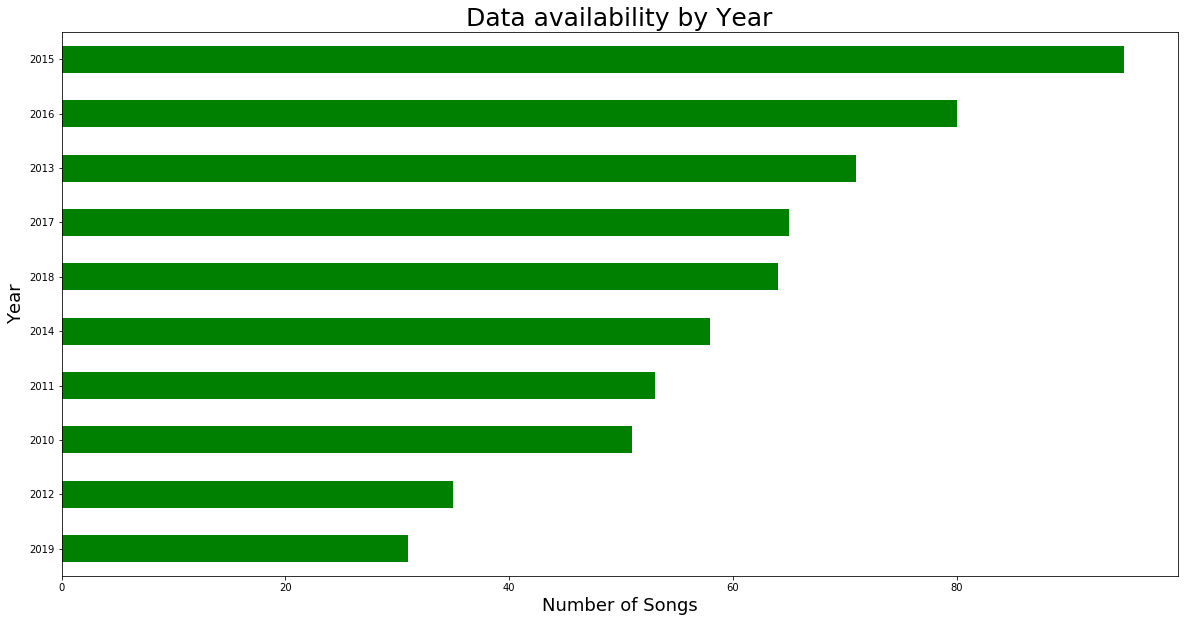

In [29]:
plt.figure(figsize=(20,10))
df.Year.value_counts().sort_values().plot(kind = 'barh',color='green')
plt.xlabel("Number of Songs",fontsize=18)
plt.ylabel('Year',fontsize=18)
plt.title("Data availability by Year",fontsize=25)


#### <center><font color=#008000>The maximum number of song in the past 9 years top chart's come from the year 2015</font></center>

In [30]:
df['Genre'].value_counts().head(10)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Data availability by Year')

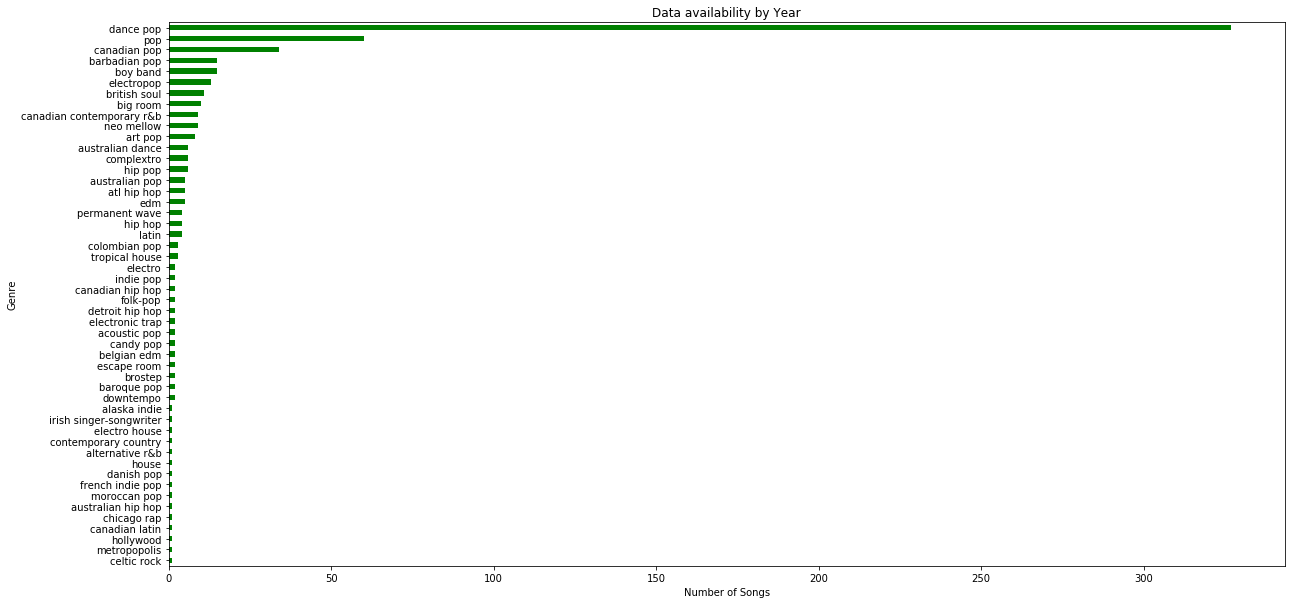

In [31]:
plt.figure(figsize=(20,10))
df.Genre.value_counts().sort_values().plot(kind = 'barh',color='green')
plt.xlabel("Number of Songs")
plt.ylabel('Genre')
plt.title("Data availability by Year")



#### <center><font color=#008000>'DANCE POP' is by far the most popular genre of songs in the top charts data.</font></center>

In [66]:
top = df.sort_values(['Popularity'],ascending=[False])

In [33]:
top.head()

Title         Artist         Genre  Year  Beats Per Minute  \
572             Memories       Maroon 5           pop  2019                91   
573  Lose You To Love Me   Selena Gomez     dance pop  2019               102   
574    Someone You Loved  Lewis Capaldi           pop  2019               110   
575             Señorita   Shawn Mendes  canadian pop  2019               117   
576    How Do You Sleep?      Sam Smith           pop  2019               111   

     Energy  Danceability  Loudness(dB)  Liveness  Valence  Duration  \
572      32            76            -7         8       57       189   
573      34            51            -9        21        9       206   
574      41            50            -6        11       45       182   
575      54            76            -6         9       75       191   
576      68            48            -5         8       35       202   

     Acousticness  Speechiness  Popularity  
572            84            5          99  
573            58            4          97  
574            75            3          96  
575             4            3          95  
576            15            9          93

#### <center><font color=#008000>Most Popular genre expressed as an interactice plot</font></center>

In [34]:
Genre_counts_index = top.Genre.value_counts().index
fig = go.Figure(
    data = go.Bar( x=Genre_counts_index, y=top.Genre.value_counts()),
    layout = go.Layout(
        title_text = "Number of Tracks by Genre",
        yaxis = dict(title_text="Track Count"),
        xaxis = dict(title_text="Track Genre"),
        
    )
)
fig.show()

<img src="plot1.png"/>

In [52]:
top.head()

Title         Artist         Genre  Year  Beats Per Minute  \
572             Memories       Maroon 5           pop  2019                91   
573  Lose You To Love Me   Selena Gomez     dance pop  2019               102   
574    Someone You Loved  Lewis Capaldi           pop  2019               110   
575             Señorita   Shawn Mendes  canadian pop  2019               117   
576    How Do You Sleep?      Sam Smith           pop  2019               111   

     Energy  Danceability  Loudness(dB)  Liveness  Valence  Duration  \
572      32            76            -7         8       57       189   
573      34            51            -9        21        9       206   
574      41            50            -6        11       45       182   
575      54            76            -6         9       75       191   
576      68            48            -5         8       35       202   

     Acousticness  Speechiness  Popularity  
572            84            5          99  
573            58            4          97  
574            75            3          96  
575             4            3          95  
576            15            9          93

In [18]:
# Performance of the Top 20 Artists in the past 9 years.

In [35]:
top["Artist"].value_counts().head(20)

Katy Perry           17
Justin Bieber        16
Maroon 5             15
Rihanna              15
Lady Gaga            14
Bruno Mars           13
Ed Sheeran           11
Shawn Mendes         11
The Chainsmokers     11
Pitbull              11
Adele                10
Jennifer Lopez       10
Calvin Harris        10
Britney Spears        9
Ariana Grande         9
Kesha                 9
David Guetta          9
OneRepublic           9
Justin Timberlake     9
Taylor Swift          8
Name: Artist, dtype: int64

In [36]:
fig = px.box(top, x='Artist', y = 'Popularity')
fig.update_layout(title_text = 'Performance of the Top 20 Artists in the Last 9 years', xaxis = dict(tickangle=45))
fig.show()

<img src="plot2.png"/>

#### <center><font color=#008000>'Maroon 5' Seems to be most popular artist (by song popularity score) with the range of popularities of various artists varying from 99 to 0.</font></center>

In [37]:
fig = px.scatter(top, x="Artist",y="Popularity",color = "Genre", hover_name = "Title")
fig.update_layout(
    title_text = "Popularity by Artist and Genre and Song Name",
    xaxis=dict(tickangle=45)
)
fig.show()

<img src="plot3.png"/>

#### <center><font color=#008000>Although the most popular genre is 'Dance pop', there is only one 'Dance pop' song in the popularity mark above 90, which is 'Loose You to Love Me' by Salena Gomez, which is shared mainly by 'Pop' besides several others.</font></center>

In [38]:
fig = px.box(top, x="Genre", y="Popularity")
fig.update_layout(
    title_text = "All Genre Popularity Variations",
    xaxis=dict(tickangle=45)
)
fig.show()

<img src="plot4.png"/>

#### <center><font color=#008000>Popularity can cary not only within other genres but also within one genre itself.<br> The Largest Popularity range can be observed in the genre 'Folk-pop'.</font></center>

#### Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [39]:
correlation=top.iloc[:,3:].corr(method='pearson')

fig = go.Figure(
    data = [
        go.Heatmap(
            z=correlation, x=correlation.columns, y=correlation.index,
            hoverongaps = False
        )
    ],
    layout = go.Layout(
        title_text = "Correlations of the numeric scores",
        autosize = True,
        width = 650,
        height = 650
    )
)
fig.show()

<img src="plot5.png"/>

<font color=#008000><b>Some of the most positively correlated values are -</b></font>
<ul>
    <li><font color=#008000>Danceability and Valence</font></li>
    <li><font color=#008000>Energy and Loudness</font></li>
    <li><font color=#008000>Valence and Energy</font></li>
    </ul>

<font color=#008000><b>Some of the most negatively correlated values are -</b></font>
<ul>
    <li><font color=#008000>Energy and Acousticness</font></li>
    <li><font color=#008000>Valence and Acousticness</font></li>
    <li><font color=#008000>Valence and Energy</font></li>
    </ul>

#### SNS Pairplot

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown below-

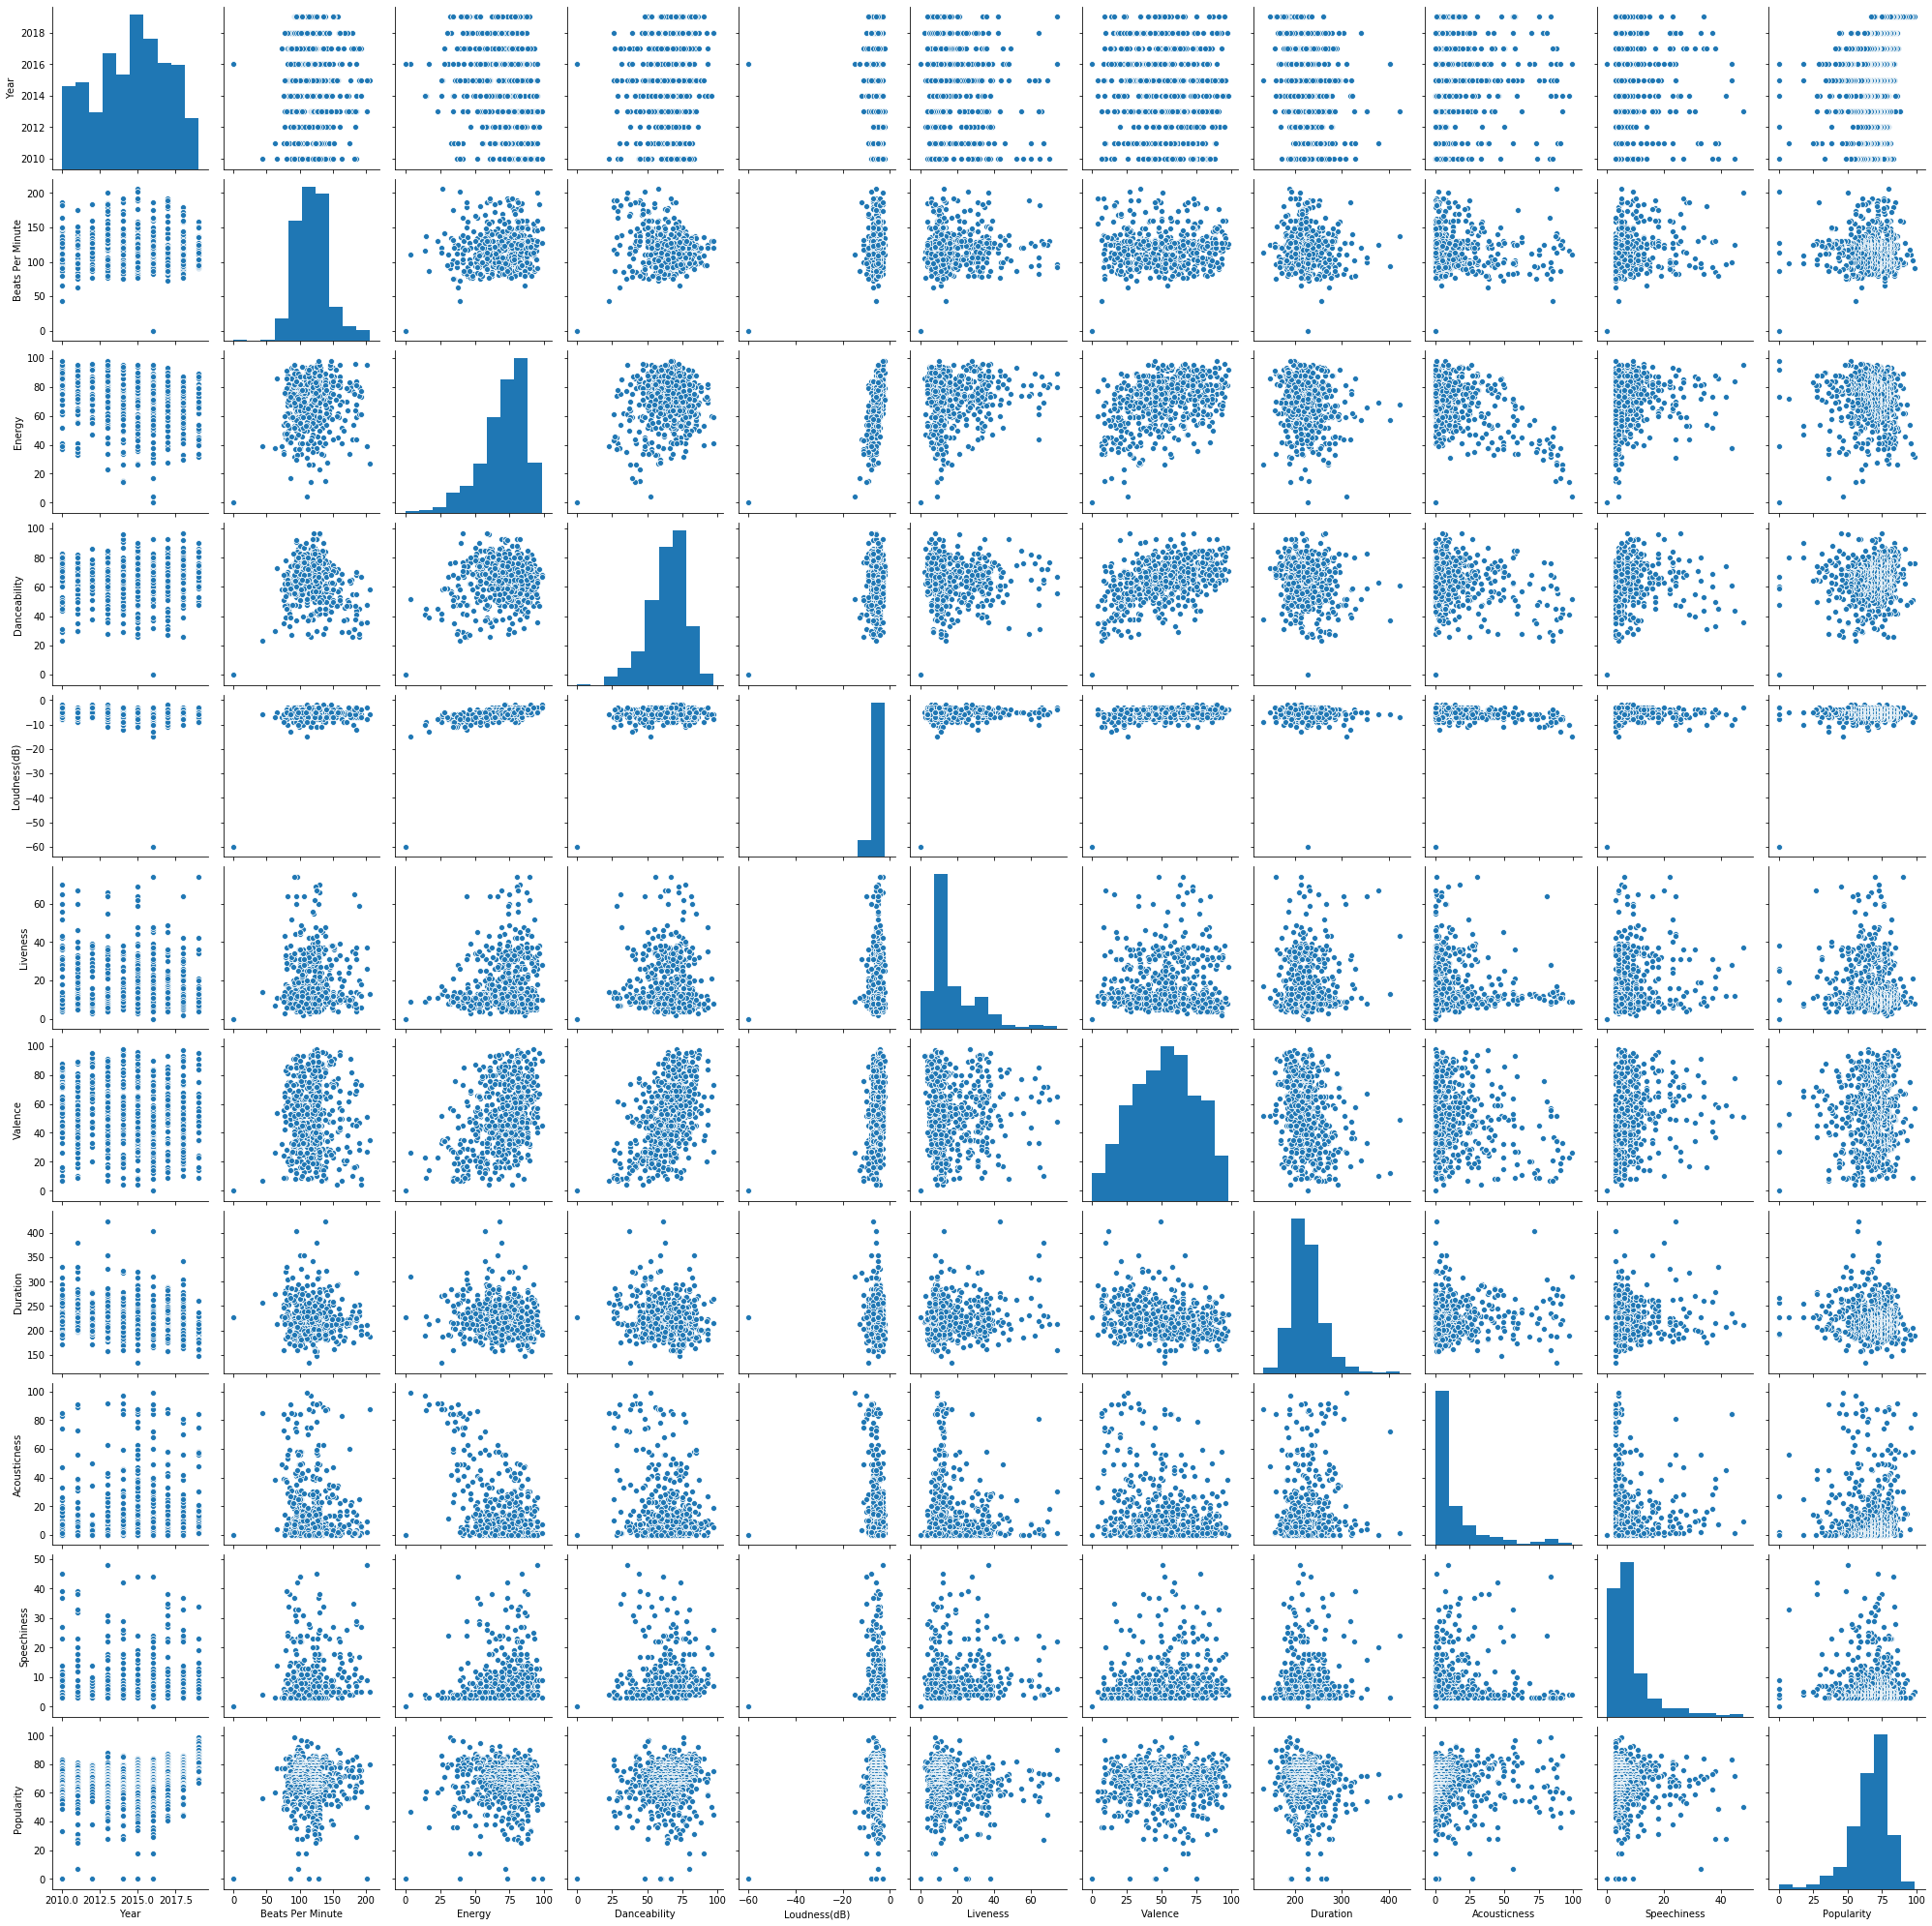

In [24]:
sns.pairplot(top.iloc[:,3:])


#### Wordcloud:

A tag cloud (word cloud or wordle or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text.

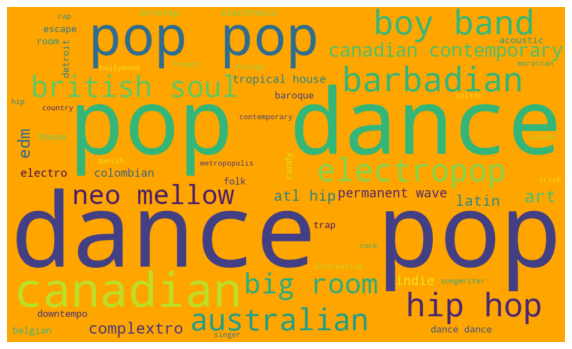

In [58]:
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 300,
                      background_color='orange').generate(" ".join(top.Genre))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

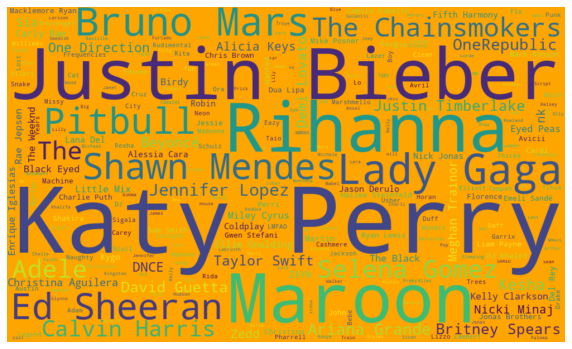

In [59]:
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 300,
                      background_color='orange').generate(" ".join(top.Artist))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

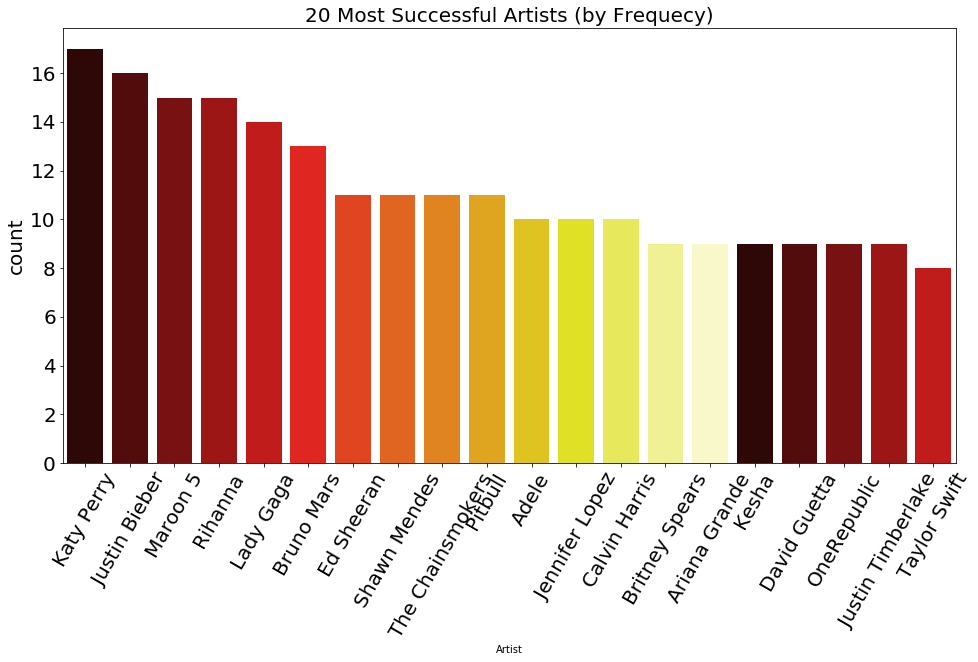

In [40]:
plt.figure(figsize=(16,8))
plt.title('20 Most Successful Artists (by Frequecy)',fontsize=20)
plt.xlabel('Artist', fontsize=10)
plt.ylabel('Frequency of Coming in Top Tracks of the Year', fontsize=20)

sns.countplot(top.Artist,order=pd.value_counts(top.Artist).iloc[:20].index,palette=sns.color_palette("hot", 15))

plt.xticks(size=20,rotation=60)
plt.yticks(size=20)

plt.show()

#### <center><font color=#008000>Katy Perry appearing 16 times in the past 9 years' top charts is the most successful artist by frequency of occurence.</font></center>

### Dependence of VIbe of Song based on it's Tempo

In [41]:
fig = px.scatter(top, x="Beats Per Minute", y="Valence",size='Acousticness'
                 ,color="Genre")
fig.update_layout(title_text = 'Valence against Acouticness, BPM and Genre', xaxis = dict(tickangle=0))
fig.show()


<img src="plot6.png"/>

#### <center><font color=#008000>Valence against BMP is a good measure to understand the dependence of the happy vibe of the song against its tempo.<br><br> This graph explains how the most 'Happy' songs have a tempo in the range 80 to 155. </font></center>

In [42]:
fig = px.box(top, x="Popularity", y="Beats Per Minute",points='all')
fig.update_layout(
    title_text = "Popularity And BPM of a Song",
    xaxis=dict(tickangle=0),
    
)
fig.show()

<img src="plot1.png"/>

#### <center><font color=#008000>Following graph explains the dependence of the sucess of a song on its tempo. <br><br> Most of the songs having high popularity have BMP around 86 to 150 beats per minute i.e. neither too fast not too slow. </font></center>

# <u><center> Recommendation System</center></u>

<img src='recom.jpg'/>

<b><font color=#008000>The task of recommender system to suggest similar information or content, based on user preferences.
These preferences can be either directly obstained by user's activity history analysis or by the observing other similar user's activity history.

Recommender systems are utilized in a variety of areas and are most commonly recognized as playlist generators for video and music services like Netflix, YouTube and Spotify, product recommenders for services such as Amazon, or content recommenders for social media platforms such as Facebook and Twitter.These systems can operate using a single input, like music, or multiple inputs within and across platforms like news, books, and search queries.</font><b>

## Content Based Recommendation System

<b><font color=#008000>Content-based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on an item's features. In this system, keywords are used to describe the items and a user profile is built to indicate the type of item this user likes.</font><b>

<img src="last.png"/>

### Following Libaries have been used analyse the obtained data:</font></b> 
<font color=#008000><ul>
    <li><b>CountVectorizer</b> - The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary. Call the fit() function in order to learn a vocabulary from one or more documents. </li> <br>
    <li><b>cosine_similarity</b> - Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space. It is defined to equal the cosine of the angle between them, which is also the same as the inner product of the same vectors normalized to both have length 1.</li>   
   </ul></font>
    

In [43]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import normalize
import numpy as np 

In [67]:
top.head()

Title         Artist         Genre  Year  Beats Per Minute  \
572             Memories       Maroon 5           pop  2019                91   
573  Lose You To Love Me   Selena Gomez     dance pop  2019               102   
574    Someone You Loved  Lewis Capaldi           pop  2019               110   
575             Señorita   Shawn Mendes  canadian pop  2019               117   
576    How Do You Sleep?      Sam Smith           pop  2019               111   

     Energy  Danceability  Loudness(dB)  Liveness  Valence  Duration  \
572      32            76            -7         8       57       189   
573      34            51            -9        21        9       206   
574      41            50            -6        11       45       182   
575      54            76            -6         9       75       191   
576      68            48            -5         8       35       202   

     Acousticness  Speechiness  Popularity  
572            84            5          99  
573            58            4          97  
574            75            3          96  
575             4            3          95  
576            15            9          93

In [68]:
top.reset_index(inplace=True)
top.reset_index(inplace=True)

In [69]:
top.head()

level_0  index                Title         Artist         Genre  Year  \
0        0    572             Memories       Maroon 5           pop  2019   
1        1    573  Lose You To Love Me   Selena Gomez     dance pop  2019   
2        2    574    Someone You Loved  Lewis Capaldi           pop  2019   
3        3    575             Señorita   Shawn Mendes  canadian pop  2019   
4        4    576    How Do You Sleep?      Sam Smith           pop  2019   

   Beats Per Minute  Energy  Danceability  Loudness(dB)  Liveness  Valence  \
0                91      32            76            -7         8       57   
1               102      34            51            -9        21        9   
2               110      41            50            -6        11       45   
3               117      54            76            -6         9       75   
4               111      68            48            -5         8       35   

   Duration  Acousticness  Speechiness  Popularity  
0       189            84            5          99  
1       206            58            4          97  
2       182            75            3          96  
3       191             4            3          95  
4       202            15            9          93

In [426]:
#final = top[['Title','Artist','Genre', 'Beats Per Minute','Valence']]

In [70]:
#final.head()


In [70]:
top.drop(columns=['index'],inplace=True)

In [71]:
top.head(2)

level_0                Title        Artist      Genre  Year  \
0        0             Memories      Maroon 5        pop  2019   
1        1  Lose You To Love Me  Selena Gomez  dance pop  2019   

   Beats Per Minute  Energy  Danceability  Loudness(dB)  Liveness  Valence  \
0                91      32            76            -7         8       57   
1               102      34            51            -9        21        9   

   Duration  Acousticness  Speechiness  Popularity  
0       189            84            5          99  
1       206            58            4          97

In [73]:
top = top.rename(columns={'level_0':'index'})

In [74]:
top.head(2)

index                Title        Artist      Genre  Year  \
0      0             Memories      Maroon 5        pop  2019   
1      1  Lose You To Love Me  Selena Gomez  dance pop  2019   

   Beats Per Minute  Energy  Danceability  Loudness(dB)  Liveness  Valence  \
0                91      32            76            -7         8       57   
1               102      34            51            -9        21        9   

   Duration  Acousticness  Speechiness  Popularity  
0       189            84            5          99  
1       206            58            4          97

<h2>Assiging a categorical label of tempo and Positivity Vibe on the Data Frame.</h2>

In [75]:
top['BPM Category'] = top['Beats Per Minute'].apply(lambda x: "Slow" if int(x)<85 else("Moderately Fast" if int(x)<120 else("Fast and Bright" if int(x)<=168 else 'Very Fast')))

In [76]:
top['Vibe'] = top['Valence'].apply(lambda x: "Very Sad" if int(x)<=15 else("Sad" if int(x)<50 else("Happy" if int(x)<85 else "Very Happy")))

In [77]:
top.head()

index                Title         Artist         Genre  Year  \
0      0             Memories       Maroon 5           pop  2019   
1      1  Lose You To Love Me   Selena Gomez     dance pop  2019   
2      2    Someone You Loved  Lewis Capaldi           pop  2019   
3      3             Señorita   Shawn Mendes  canadian pop  2019   
4      4    How Do You Sleep?      Sam Smith           pop  2019   

   Beats Per Minute  Energy  Danceability  Loudness(dB)  Liveness  Valence  \
0                91      32            76            -7         8       57   
1               102      34            51            -9        21        9   
2               110      41            50            -6        11       45   
3               117      54            76            -6         9       75   
4               111      68            48            -5         8       35   

   Duration  Acousticness  Speechiness  Popularity     BPM Category      Vibe  
0       189            84            5          99  Moderately Fast     Happy  
1       206            58            4          97  Moderately Fast  Very Sad  
2       182            75            3          96  Moderately Fast       Sad  
3       191             4            3          95  Moderately Fast     Happy  
4       202            15            9          93  Moderately Fast       Sad

#### Selection of Features 

The recommendation will be generated based on the similarity score created by these features.

In [78]:
features = ['Artist','Genre','BPM Category','Vibe']

### Combining these features so as to create a string on which similarity will be calculated.

In [79]:
def combine_features(row):
    return row['Vibe']+" "+row['Genre']+" "+row['BPM Category']

In [80]:
top["combined_features"] = top.apply(combine_features,axis=1)

In [81]:
top.head()

index                Title         Artist         Genre  Year  \
0      0             Memories       Maroon 5           pop  2019   
1      1  Lose You To Love Me   Selena Gomez     dance pop  2019   
2      2    Someone You Loved  Lewis Capaldi           pop  2019   
3      3             Señorita   Shawn Mendes  canadian pop  2019   
4      4    How Do You Sleep?      Sam Smith           pop  2019   

   Beats Per Minute  Energy  Danceability  Loudness(dB)  Liveness  Valence  \
0                91      32            76            -7         8       57   
1               102      34            51            -9        21        9   
2               110      41            50            -6        11       45   
3               117      54            76            -6         9       75   
4               111      68            48            -5         8       35   

   Duration  Acousticness  Speechiness  Popularity     BPM Category      Vibe  \
0       189            84            5          99  Moderately Fast     Happy   
1       206            58            4          97  Moderately Fast  Very Sad   
2       182            75            3          96  Moderately Fast       Sad   
3       191             4            3          95  Moderately Fast     Happy   
4       202            15            9          93  Moderately Fast       Sad   

                    combined_features  
0           Happy pop Moderately Fast  
1  Very Sad dance pop Moderately Fast  
2             Sad pop Moderately Fast  
3  Happy canadian pop Moderately Fast  
4             Sad pop Moderately Fast

In [87]:
displayDF = top[['Title',"Genre","Artist","Year"]]

In [88]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(top["combined_features"])
cosine_sim = cosine_similarity(count_matrix)

### Top three songs Recommender function

In [89]:
def get_title_from_index(index):
    return top[top.index == index]["Title"].values[0]
def get_index_from_title(title):
    return top[top.Title==title]['index'].values[0]

In [90]:
def findRecommend():
    i=0
    song_like = input("Enter the name of the song you like: ")
    song_index = get_index_from_title(song_like)
    similar_songs = list(enumerate(cosine_sim[song_index]))
    sorted_similar_songs = sorted(similar_songs,key = lambda x:x[1],reverse=True)
    print("----------------------WELCOME TO SPOTIFY SONG RECOMMENDER---------------------------")
    print("Since you like:", song_like, " You must listen to: \n")
    for song in sorted_similar_songs[1:]:
        final_title = get_title_from_index(song[0])
        print(final_title)
        print(displayDF[displayDF['Title']==str(final_title)])
        i+=1
        if i>3:
            break
    return 


In [93]:
try:
    findRecommend()
except Exception as e:
    print("This songs is not present in our database, Try again")

Enter the name of the song you like: Someone You Loved
----------------------WELCOME TO SPOTIFY SONG RECOMMENDER---------------------------
Since you like: Someone You Loved  You must listen to: 

How Do You Sleep?
               Title Genre     Artist  Year
4  How Do You Sleep?   pop  Sam Smith  2019
What Lovers Do (feat. SZA)
                         Title Genre    Artist  Year
95  What Lovers Do (feat. SZA)   pop  Maroon 5  2018
Just the Way You Are
                    Title Genre      Artist  Year
116  Just the Way You Are   pop  Bruno Mars  2011
125  Just the Way You Are   pop  Bruno Mars  2010
Just the Way You Are
                    Title Genre      Artist  Year
116  Just the Way You Are   pop  Bruno Mars  2011
125  Just the Way You Are   pop  Bruno Mars  2010


<img src='final.jpg'/>

<center><font color=#008000><h1>Thank You</h1></font></center>